In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


18:22:35 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=578019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=393940;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

18:22:36 INFO      Starting 3ML!                                                                     ]8;id=304555;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=787027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=316811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=45793;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=386929;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=576482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=141342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=897064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

18:22:38 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=496147;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=986099;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=161231;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=835202;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=448854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=860298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:22:38 WARNING   No fermitools installed                                              ]8;id=219510;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=876520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\


WARNING NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "process_dec_bins" failed type inference due to: Use of unsupported NumPy function 'numpy.einsum' or unsupported use of the function.

File "../../../../.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py", line 39:
def process_dec_bins(sflux, w1, w2, ss1, ss2):
    ss1_sum = np.einsum('ij,j->i', sflux, ss1) * w1
    ^

During: typing of get attribute at /data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py (39)

File "../../../../.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py", line 39:
def process_dec_bins(sflux, w1, w2, ss1, ss2):
    ss1_sum = np.einsum('ij,j->i', sflux, ss1) * w1
    ^



WARNING NumbaWarning: Function "process_dec_bins" was compiled in object mode without forceobj=Tru

Yourlib init successfully!!!


In [2]:
# you can do some change about the lib and reload it any time.
reload(my)

Load sub from Mystat: : 40it [00:00, 71.92it/s]]
Load sub from Mystat: : 40it [00:00, 217.18it/s]                            

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

18:22:43 INFO      Creating singleton for                                                            ]8;id=959326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=536104;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_20240131_hscpsf_mc.               
                  root                                                                                             

18:22:49 INFO      Creating singleton for                                                            ]8;id=299014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=268740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A_DR_xsq.root                          

Load sub from Mystat: : 40it [00:19, 217.18it/s]

18:23:01 INFO      Region of Interest:                                                                   ]8;id=376222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=238055;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=105632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=871418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=740687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=216389;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 15.000 deg                                                              

         INFO                                                                                            ]8;id=638496;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=360848;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=712099;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=945590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=421466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=995182;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 178 x 178 px                                                           ]8;id=89497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=860111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=491262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=631374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=224360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=927903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=176779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=875547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=671242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=860953;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=38159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=505296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_20240131_hscpsf_mc                
                  .root                                                                                            

         INFO      Number of dec bins: 120                                                          ]8;id=142588;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=263082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 7                                 ]8;id=844266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=676955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=85315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=265681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=950289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=322806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=479184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=687317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,2.884156e+08,2.880460e+08,1.001283,34461,112.980072
1,1,1024,RING,6.065269e+07,6.041455e+07,1.003942,34461,112.980072
2,2,1024,RING,1.104007e+07,1.089833e+07,1.013005,34461,112.980072
3,3,1024,RING,1.186256e+06,1.142965e+06,1.037876,34461,112.980072
4,4,1024,RING,4.424898e+05,4.161349e+05,1.063332,34461,112.980072
5,5,1024,RING,6.513125e+04,5.726578e+04,1.137350,34461,112.980072
6,6,1024,RING,3.904075e+04,3.592289e+04,1.086793,34461,112.980072


18:23:02 INFO      This Map Tree contains 1132.600 transits in the first bin                        ]8;id=945860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=464259;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 3.86 Mb                                                         ]8;id=197571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=95171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=898635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=58615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=144521;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=460176;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=115265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=884021;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=445452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=485248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

         INFO      Region of Interest:                                                                   ]8;id=271390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=522040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=915488;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=426933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=409173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=224663;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 15.000 deg                                                              

         INFO                                                                                            ]8;id=653674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=849376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=307227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=194637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=601461;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=502289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 178 x 178 px                                                           ]8;id=766027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=966163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=686128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=674193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=444431;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=471085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=221096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=151678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=97856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=264720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=633890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=870105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A_DR_xsq.root                          

         INFO      Number of dec bins: 110                                                          ]8;id=440175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=267718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=35015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=52874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=93192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=659911;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=257613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=57911;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=851826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=265445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,3.734501e+06,3.714263e+06,1.005449,34461,112.980072
1,1,1024,RING,7.595275e+06,7.546825e+06,1.006420,34461,112.980072
2,2,1024,RING,4.092854e+06,4.047013e+06,1.011327,34461,112.980072
3,3,1024,RING,1.138128e+06,1.113246e+06,1.022352,34461,112.980072
4,4,1024,RING,1.029494e+05,9.373645e+04,1.098285,34461,112.980072
5,5,1024,RING,1.859325e+04,1.494752e+04,1.243902,34461,112.980072
6,6,1024,RING,9.963699e+03,7.924110e+03,1.257390,34461,112.980072
7,7,1024,RING,2.330990e+03,1.629017e+03,1.430918,34461,112.980072
8,8,1024,RING,7.053900e+02,4.736132e+02,1.489380,34461,112.980072
9,9,1024,RING,2.158500e+02,1.758962e+02,1.227144,34461,112.980072


         INFO      This Map Tree contains 1570.300 transits in the first bin                        ]8;id=45946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=136653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 7.72 Mb                                                         ]8;id=135116;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=932257;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=192631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=783366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (14):                                                       ]8;id=366795;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=623566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=526622;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=712738;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']            ]8;id=143354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=620821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"
Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


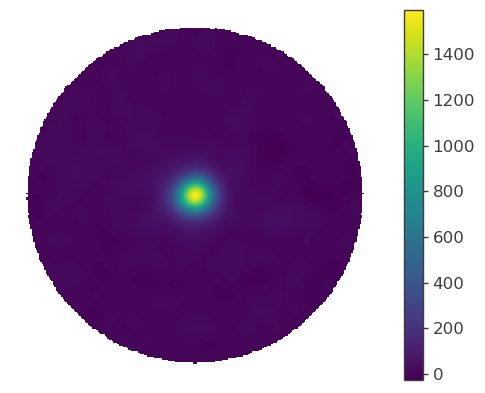

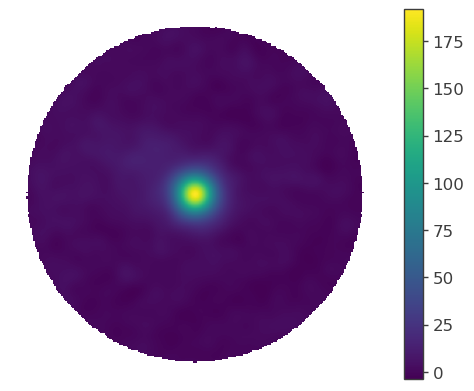

In [3]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"
# maptree = "../../data/20210305_20230731_ihep_goodlist.root"
# maptree = "../../data/20210305-20230731_trans_fromhsc.root"
# response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/WCDA_DR_psf.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"
maptree = "../../data/20240731_hsc_out.root"
response="../../data/DR_ihep_20240131_hscpsf_mc.root"

# maptree2 = "../../data/KM2A_all_final.root" #old catalog
# response2 = "../../data/KM2A_DR_all.root"

# maptree2 = "../../data/KM2A1234full_skymap_rcy.root"
# response2 = "../../data/KM2A1234full_mcpsf_DRfinal.root"

maptree2 = "../../data/KM2A_20240731_xsq_out.root"
response2 = "../../data/KM2A_DR_xsq.root"

region_name="Crab_jf_241113"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
    
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 6.0
model_radius = 15.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)
KM2A = HAL("KM2A", maptree2, response2, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

KM2A.set_active_measurements(0, 13)
KM2A.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all_wcda.png",dpi=300)

fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all_km2a.png",dpi=300)

In [ ]:
Modelname="1pt+1gaus+GDE"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
# crab = my.setsorce("crab",ra1,dec1, fitrange=1,
#                 indexb=(-10,-1), kb=(1e-14, 1e-8), # only index, means its powerlaw
#                 )

crab = my.setsorce("crab",ra1,dec1, fitrange=1, alpha=-2.6,beta=0.1, piv=20,
                spec=Log_parabola()  # or you can specify    
                )
# crab2 = my.setsorce("crab2",ra1,dec1, fitrange=0.5, indexb=(-10,-1), kb=(1e-14, 1e-8)
#                 )

ext1 = my.setsorce("ext1",85.5,23.5, fitrange=1, sigma=1, sb=(0,3), piv=20, # indexb=(-10,1),
                kb=(1e-15, 1e-8), alpha=-2.6, beta=0.1, spec=Log_parabola()
                )

Diffuse = my.set_diffusebkg(
                ra1=ra1, dec1=dec1, lr=data_radius, br=data_radius, 
                K = 3.3e-13, index = -2.3, alpha=-2.6,beta=0.1, spec=Log_parabola(), piv=20,
                Kf=False, indexf=False
                )

lm = Model(crab, ext1, Diffuse) #crab2,

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  2
Particle sources  0

Free parameters (13):
--------------------

                                          value min_value max_value  \
crab.position.ra                          83.63     82.63     84.63   
crab.position.dec                         22.02     21.02     23.02   
crab.spectrum.main.Log_parabola.K           0.0       0.0  100000.0   
crab.spectrum.main.Log_parabola.alpha      -2.6      None      None   
crab.spectrum.main.Log_parabola.beta        0.1      None      None   
ext1.Gaussian_on_sphere.lon0               85.5      84.5      86.5   
ext1.Gaussian_on_sphere.lat0               23.5      22.5      24.5   
ext1.Gaussian_on_sphere.sigma               1.0       0.0       3.0   
ext1.spectrum.main.Powerlaw.K               0.0       0.0       0.0   
ext1.spectrum.main.Powerlaw.index          -2.6     -10.0       1.0   
Diffuse.spectrum.main.Log_parabola.K        0.0       0.0       0.0   
Diffuse.spectrum.main.Log_parabola.alpha   -2.6      None      None   
Diffuse.spectrum.main.Log_parabola.beta     0.1      None      None   

                                                    unit  
crab.position.ra                                     deg  
crab.position.dec                                    deg  
crab.spectrum.main.Log_parabola.K         keV-1 s-1 cm-2  
crab.spectrum.main.Log_parabola.alpha                     
crab.spectrum.main.Log_parabola.beta                      
ext1.Gaussian_on_sphere.lon0                         deg  
ext1.Gaussian_on_sphere.lat0                         deg  
ext1.Gaussian_on_sphere.sigma                        deg  
ext1.spectrum.main.Powerlaw.K             keV-1 s-1 cm-2  
ext1.spectrum.main.Powerlaw.index                         
Diffuse.spectrum.main.Log_parabola.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Log_parabola.alpha                  
Diffuse.spectrum.main.Log_parabola.beta                   

Fixed parameters (6):
---------------------

                                                                                    value  \
crab.spectrum.main.Log_parabola.piv                                         20000000000.0   
ext1.spectrum.main.Powerlaw.piv                                             20000000000.0   
Diffuse.SpatialTemplate_2D.K                                                          1.0   
Diffuse.SpatialTemplate_2D.hash         1334993904394561904549639836920280471394385825...   
Diffuse.SpatialTemplate_2D.ihdu                                                       0.0   
Diffuse.spectrum.main.Log_parabola.piv                                      20000000000.0   

                                       min_value max_value   unit  
crab.spectrum.main.Log_parabola.piv         None      None    keV  
ext1.spectrum.main.Powerlaw.piv             None      None    keV  
Diffuse.SpatialTemplate_2D.K                None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash             None      None         
Diffuse.SpatialTemplate_2D.ihdu              0.0      None         
Diffuse.spectrum.main.Log_parabola.piv      None      None    keV  

Properties (2):
--------------------

                                                                        value  \
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Cache_dust_bkg_template.fits   
Diffuse.SpatialTemplate_2D.frame                                         icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Load sub from Mystat: : 40it [00:17, 213.33it/s]

Best fit values:

,result,unit
parameter,,
crab.position.ra,(8.36343 +/- 0.00010) x 10,deg
crab.position.dec,(2.20132 +/- 0.00009) x 10,deg
crab.spectrum.main.Log_parabola.K,(1.167 +/- 0.008) x 10^-23,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-3.058 +/- 0.006,
crab.spectrum.main.Log_parabola.beta,(1.103 +/- 0.017) x 10^-1,
ext1.Gaussian_on_sphere.lon0,(8.575 +/- 0.006) x 10,deg
ext1.Gaussian_on_sphere.lat0,(2.330 +/- 0.004) x 10,deg
ext1.Gaussian_on_sphere.sigma,(7.8 +/- 0.5) x 10^-1,deg
ext1.spectrum.main.Powerlaw.K,(1.30 +/- 0.09) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00,-0.01,0.00,-0.01,0.01,0.01,0.04,-0.05,-0.05,0.02,0.00,0.01,-0.01
-0.01,1.00,-0.00,0.00,-0.00,0.02,0.02,-0.03,-0.03,0.01,-0.00,0.00,-0.01
0.00,-0.00,1.00,0.53,-0.12,-0.00,0.01,-0.03,-0.02,-0.00,-0.01,-0.00,-0.01
-0.01,0.00,0.53,1.00,-0.88,-0.00,0.01,-0.03,-0.02,0.01,-0.00,-0.02,-0.01
0.01,-0.00,-0.12,-0.88,1.00,-0.00,-0.02,0.03,0.03,-0.01,-0.01,0.02,0.01
0.01,0.02,-0.00,-0.00,-0.00,1.00,0.08,0.39,0.32,-0.14,-0.01,0.03,0.12
0.04,0.02,0.01,0.01,-0.02,0.08,1.00,-0.12,-0.08,-0.07,-0.00,-0.01,-0.03
-0.05,-0.03,-0.03,-0.03,0.03,0.39,-0.12,1.00,0.78,-0.15,-0.03,0.03,0.28
-0.05,-0.03,-0.02,-0.02,0.03,0.32,-0.08,0.78,1.00,-0.08,-0.09,0.04,0.32
0.02,0.01,-0.00,0.01,-0.01,-0.14,-0.07,-0.15,-0.08,1.00,-0.04,-0.22,-0.11
0.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.03,-0.09,-0.04,1.00,-0.06,0.70


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,9987.180219
WCDA,17472.782392
total,27459.962611


Values of statistical measures:

,statistical measures
AIC,54945.925724
BIC,55095.322599


Smoothing planes:   0%|          | 0/7 [00:00<?, ?it/s]

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
crab.position.ra,8.363428e+01,-1.023169e-03,1.038977e-03,1.031073e-03,deg
crab.position.dec,2.201321e+01,-9.340093e-04,8.921791e-04,9.130942e-04,deg
crab.spectrum.main.Log_parabola.K,1.167486e-23,-8.042640e-26,7.596180e-26,7.819410e-26,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-3.057931e+00,-5.901022e-03,5.904771e-03,5.902897e-03,
crab.spectrum.main.Log_parabola.beta,1.102711e-01,-1.704881e-03,1.604145e-03,1.654513e-03,
ext1.Gaussian_on_sphere.lon0,8.575457e+01,-5.702925e-02,5.558834e-02,5.630879e-02,deg
ext1.Gaussian_on_sphere.lat0,2.329790e+01,-4.106394e-02,4.182493e-02,4.144443e-02,deg
ext1.Gaussian_on_sphere.sigma,7.794582e-01,-4.566998e-02,4.479711e-02,4.523355e-02,deg
ext1.spectrum.main.Powerlaw.K,1.300470e-24,-8.741657e-26,9.226337e-26,8.983997e-26,1 / (cm2 keV s)
ext1.spectrum.main.Powerlaw.index,-2.558292e+00,-1.770352e-02,1.743463e-02,1.756908e-02,


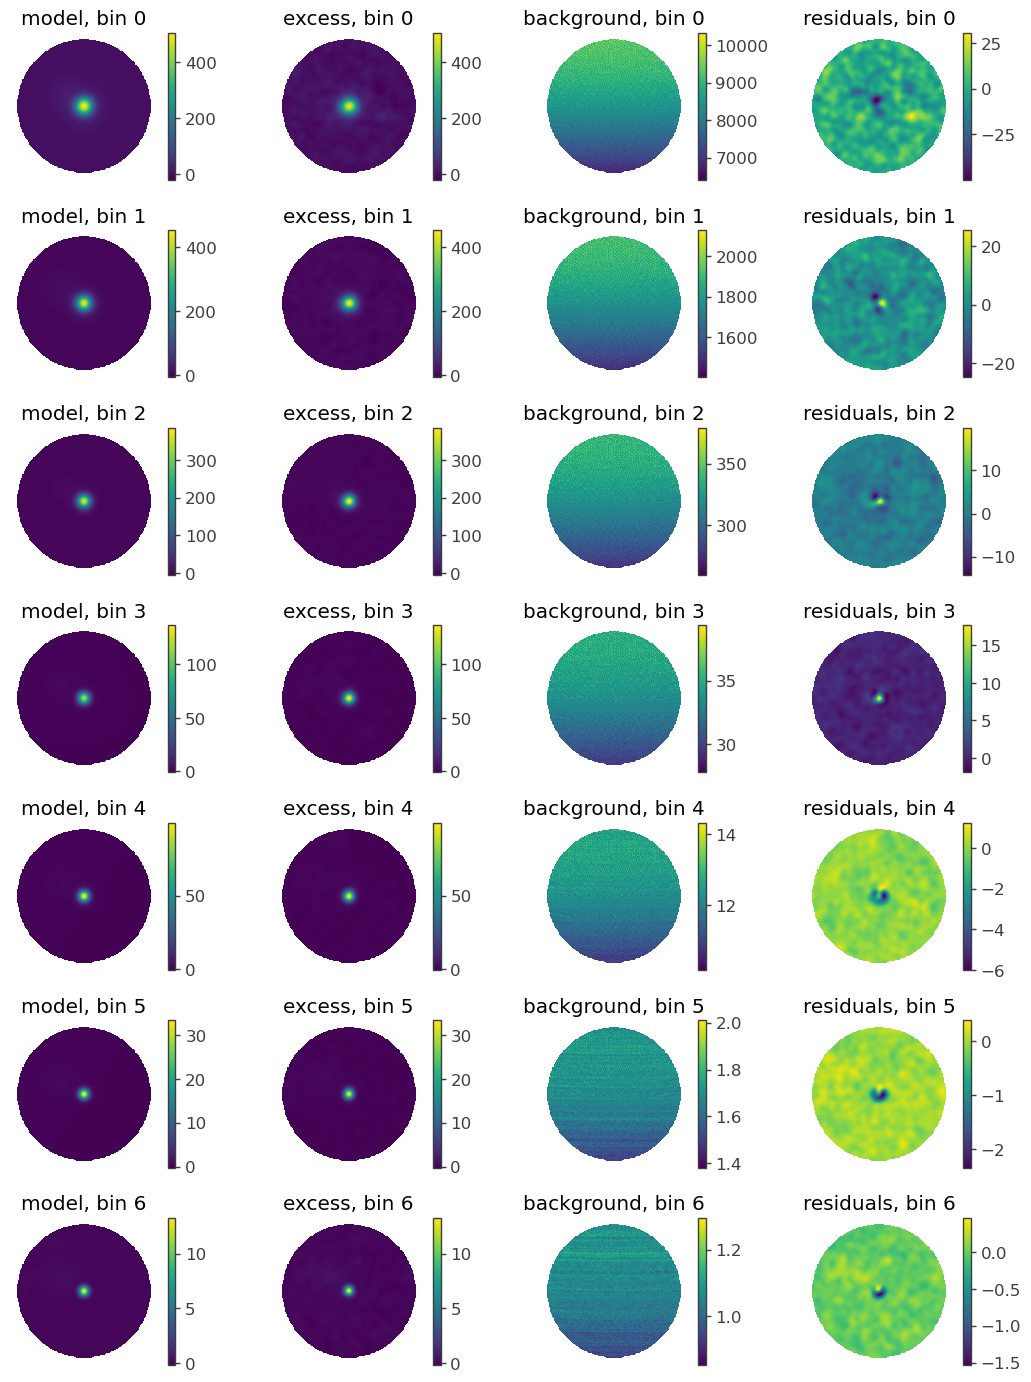

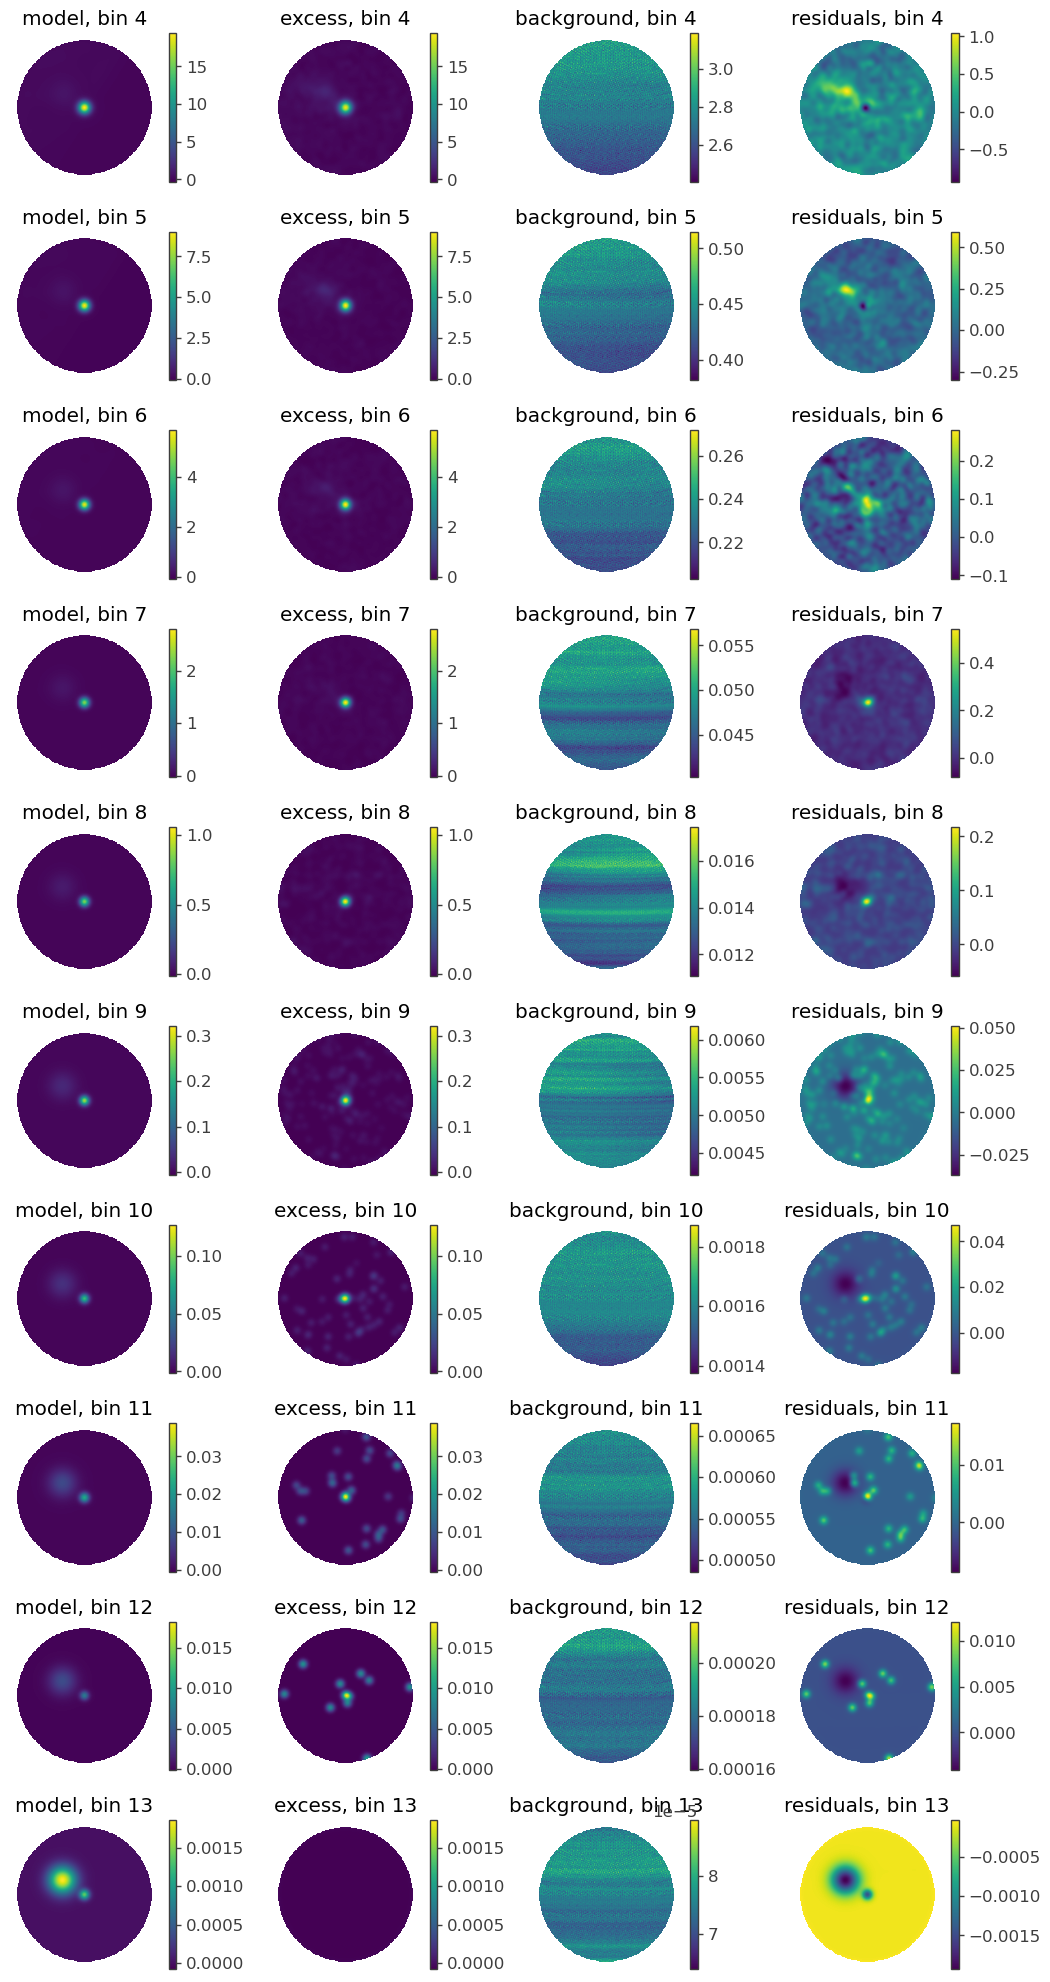

In [25]:
# Attempt the fitting; it will take approximately two minutes.
result = my.jointfit(region_name, Modelname, [WCDA,KM2A], lm, [0,4], [6,13], mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

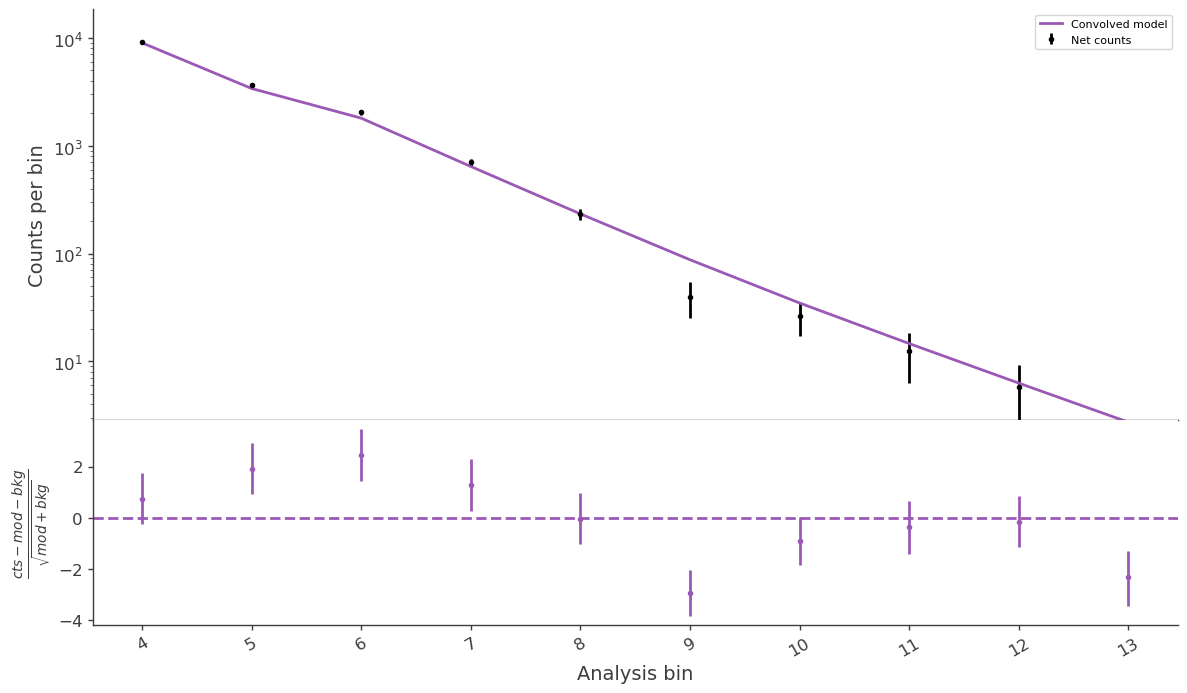

In [26]:
fig = KM2A.display_spectrum()

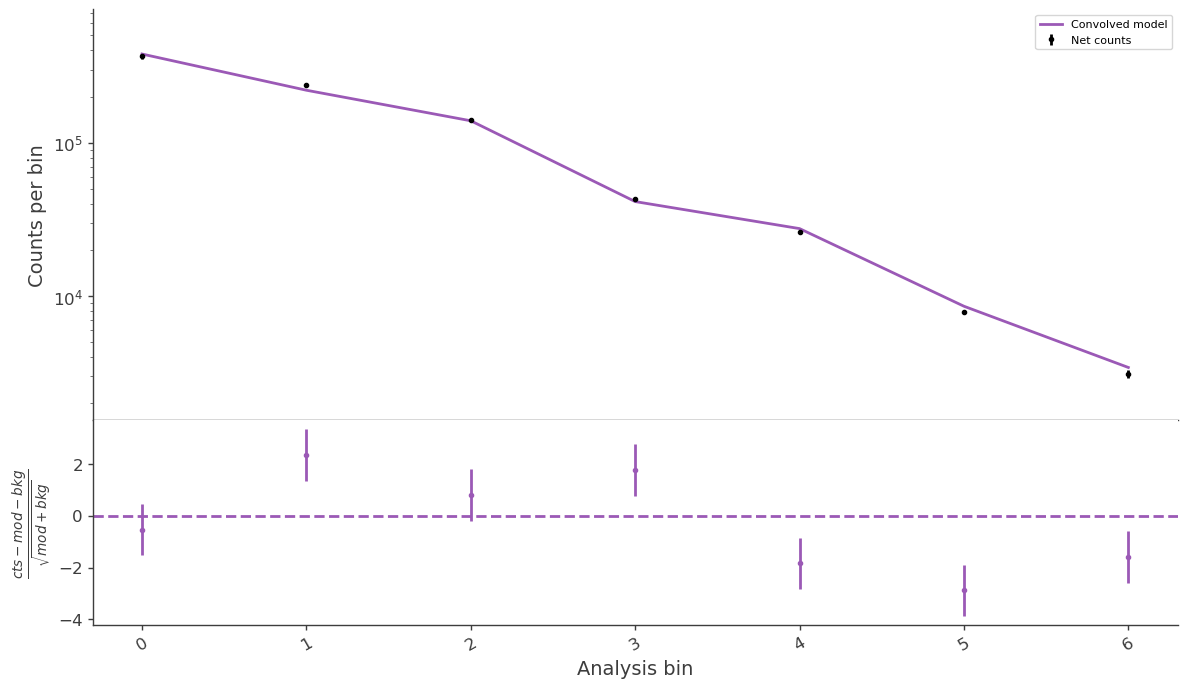

In [27]:
fig = WCDA.display_spectrum()

In [28]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1", "Diffuse"]  # A list put the sources that you want to compute TS
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, WCDA)
TSresults

100%|██████████| 3/3 [08:37<00:00, 172.59s/it]


,crab,ext1,Diffuse,TS_all,-log(likelihood)
0,214628.993074,109.392215,123.350678,281119.087766,17472.782392


In [29]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1", "Diffuse"]  # A list put the sources that you want to compute TS
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, KM2A)
TSresults

100%|██████████| 3/3 [08:38<00:00, 172.67s/it]


,crab,ext1,Diffuse,TS_all,-log(likelihood)
0,214628.993074,109.392215,123.350678,32887.100564,9987.082847


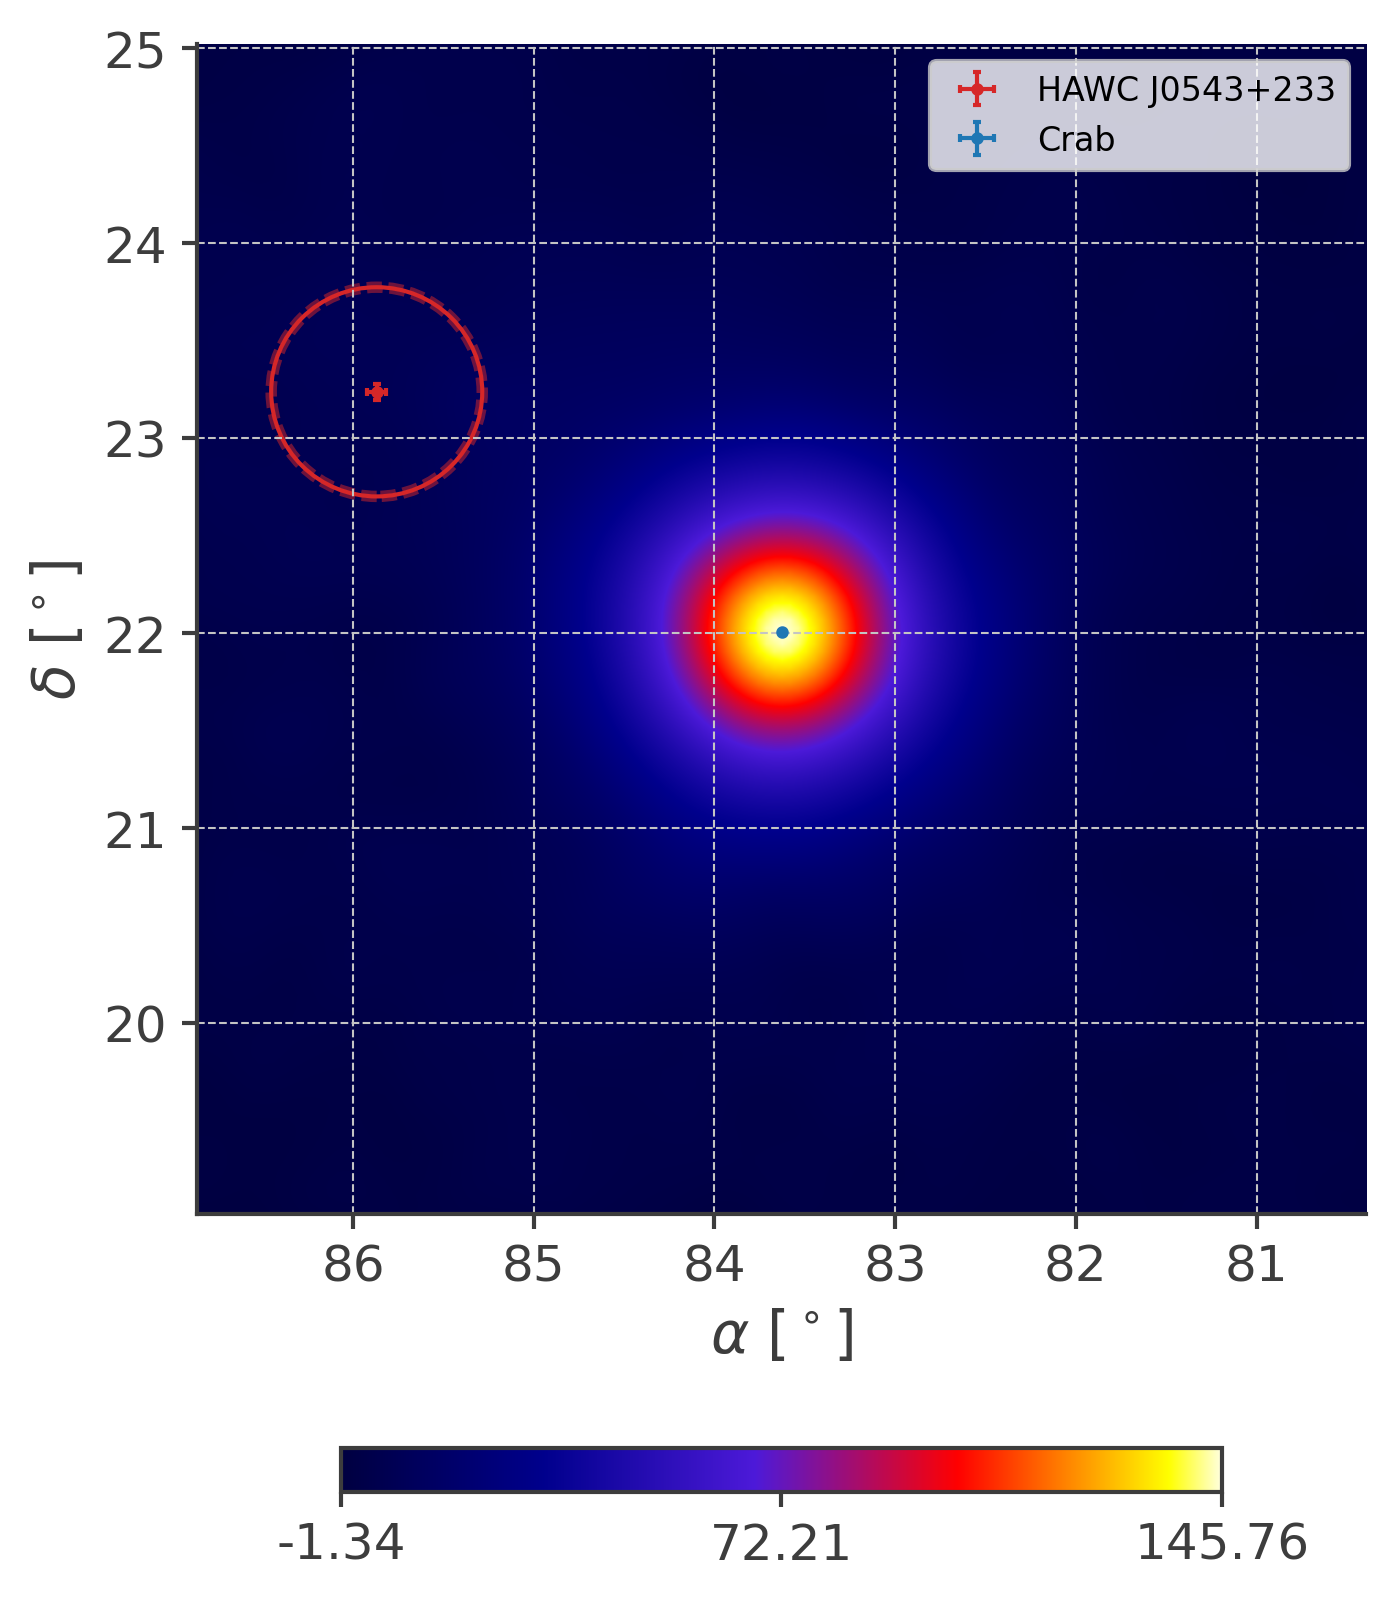

In [ ]:
%matplotlib inline
sources = my.get_sources(lm,result)
sources["HAWC J0543+233"]=sources.pop("ext1")
sources["Crab"]=sources.pop("crab")
# sources={}
map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.090 +/- 0.011) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2288.173088
total,2288.173088


Values of statistical measures:

,statistical measures
AIC,4578.346192
BIC,4588.739669


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.171 +/- 0.007) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2468.725725
total,2468.725725


Values of statistical measures:

,statistical measures
AIC,4939.451467
BIC,4949.844944


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.182 +/- 0.005) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2646.347268
total,2646.347268


Values of statistical measures:

,statistical measures
AIC,5294.694552
BIC,5305.088029


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.261 +/- 0.008) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2646.554189
total,2646.554189


Values of statistical measures:

,statistical measures
AIC,5295.108395
BIC,5305.501872


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.103 +/- 0.008) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2716.49882
total,2716.49882


Values of statistical measures:

,statistical measures
AIC,5434.997656
BIC,5445.391133


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.070 -0.014 +0.015) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2325.425454
total,2325.425454


Values of statistical measures:

,statistical measures
AIC,4652.850925
BIC,4663.244402


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.070 -0.024 +0.025) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2225.856582
total,2225.856582


Values of statistical measures:

,statistical measures
AIC,4453.713181
BIC,4464.106658


100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.153 +/- 0.018) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2286.990551
total,2286.990551


Values of statistical measures:

,statistical measures
AIC,4575.981111
BIC,4587.067744


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.169 -0.027 +0.028) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2182.200416
total,2182.200416


Values of statistical measures:

,statistical measures
AIC,4366.400840
BIC,4377.487473


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.24 +/- 0.04) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1969.888867
total,1969.888867


Values of statistical measures:

,statistical measures
AIC,3941.777743
BIC,3952.864375


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.40 -0.06 +0.07) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1592.376974
total,1592.376974


Values of statistical measures:

,statistical measures
AIC,3186.753955
BIC,3197.840588


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.50 -0.11 +0.12) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,996.481942
total,996.481942


Values of statistical measures:

,statistical measures
AIC,1994.963892
BIC,2006.050524


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.39 -0.18 +0.21) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,480.752881
total,480.752881


Values of statistical measures:

,statistical measures
AIC,963.505769
BIC,974.592402


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.9 -0.4 +0.5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,259.019789
total,259.019789


Values of statistical measures:

,statistical measures
AIC,520.039586
BIC,531.126219


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(1.8 -0.6 +0.9) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,134.230409
total,134.230409


Values of statistical measures:

,statistical measures
AIC,270.460826
BIC,281.547459


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.7 -1.3 +2.5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,64.171163
total,64.171163


Values of statistical measures:

,statistical measures
AIC,130.342334
BIC,141.428967


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(0.0 -4 +2.8) x 10^-11,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2.483455
total,2.483455


Values of statistical measures:

,statistical measures
AIC,6.966918
BIC,18.053551


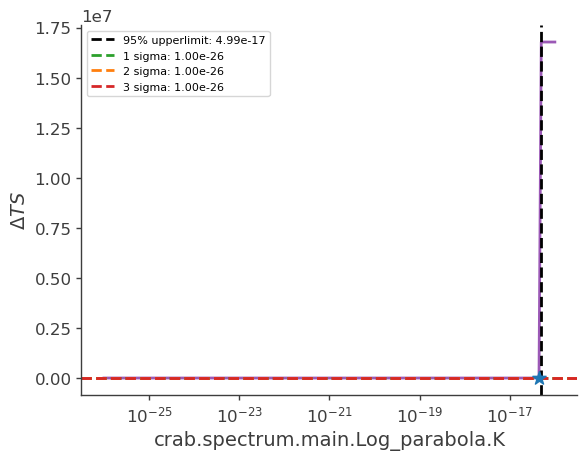

100%|██████████| 10/10 [00:33<00:00,  3.39s/it]


In [30]:
Flux_WCDA, jls1 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab", scanbin=0, piv=20)
# Flux_WCDA2, jls2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "ext1", ifpowerlawM=1)
Flux_WCD3, jls3 = my.getdatapoint(KM2A, lm, maptree2, response2, roi, "crab", scanbin=0, piv=20)
# Flux_WCDA4, jls4 = my.getdatapoint(KM2A, lm, maptree2, response2, roi, "ext1", ifpowerlawM=1)
# Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab2")

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

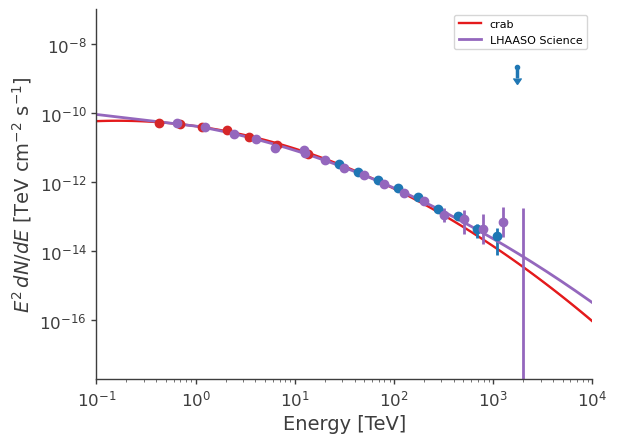

In [32]:
%matplotlib inline
x_Max=10000.
x_Min=.1
y_Min=0.2e-17
y_Max=1e-7
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["crab"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=100,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"","tab:red")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCD3,"","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,10000)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])

crab_data_km2a = np.array([
[12.59, 6.78e-12,  2.90e-13,  2.90e-13],
[19.95, 4.21e-12,  1.76e-13,  1.76e-13],
[31.62, 2.55e-12,  1.16e-13,  1.16e-13],
[50.12, 1.59e-12,  1.00e-13,  1.00e-13],
[79.43, 8.94e-13,  7.54e-14,  7.54e-14],
[125.89, 4.67e-13,  6.46e-14,  6.46e-14],
[199.53, 2.84e-13,  6.04e-14,  6.04e-14],
[316.23, 1.10e-13,  4.12e-14,  6.22e-14],
[501.19, 8.55e-14,  5.42e-14,  6.67e-14],
[794.33, 4.33e-14,  2.74e-14,  7.65e-14],
[1258.93,  6.83e-14 , 4.30e-14 , 1.20e-13],
[1995.26,  -2.12e-16,  0.00e+00,  1.73e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
plt.errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],fmt="o", c = "tab:purple") #,label='Crab Science'
plt.errorbar(crab_data_km2a[:,0], crab_data_km2a[:,1], [crab_data_km2a[:,2], crab_data_km2a[:,3]],fmt="o", c = "tab:purple") 
plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

In [11]:
f1 = Flux_WCDA[0][3]*1e9*Flux_WCDA[0][0]**2
e1 = Flux_WCDA[0][0]
f2=Flux_WCDA[0][0]**2*8.2e-14*pow(Flux_WCDA[0][0]/10,-2.9-0.19*np.log10(Flux_WCDA[0][0]/10))
print(e1, f1, f2, (f2-f1)/f2)

0.9494132728713738 3.911303316679918e-11 4.319570105494919e-11 0.09451560660993681


In [12]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",
                 modelindex=[1,1], # modelindex: pt and ext number
              #  pta=[0], exta=[0],
                   stack=[1.010229, 1.020917, 1.040597, 1.064803, 1.090451, 1.130015], #Combine bins with all bin based on signal-to-noise ratio.
                  #  stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                  #  stack=[0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   #, binc=["1","2","3","4","5"]
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 23950/23950 [00:00<00:00, 94371.26it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 64791.41it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 66117.07it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 79610.89it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 80675.89it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 79249.88it/s]


Mask all


100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


Set stack_sigma automatelly!!!


100%|██████████| 23950/23950 [00:00<00:00, 413479.40it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:00<00:00,  7.99it/s]


get ring pixnum: 100%|██████████| 19/19 [00:00<00:00, 118942.95it/s]


compute ring: 100%|██████████| 19/19 [00:00<00:00, 113359.57it/s]


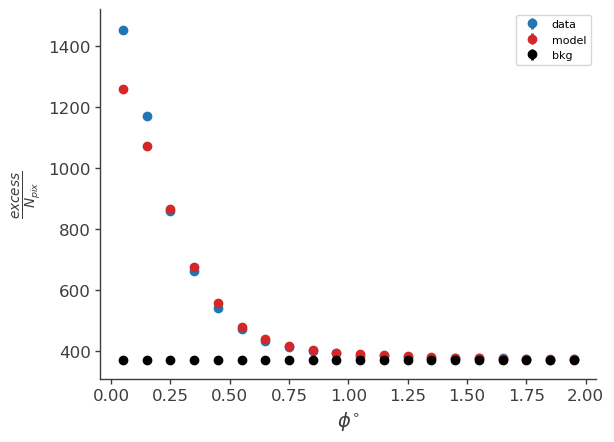

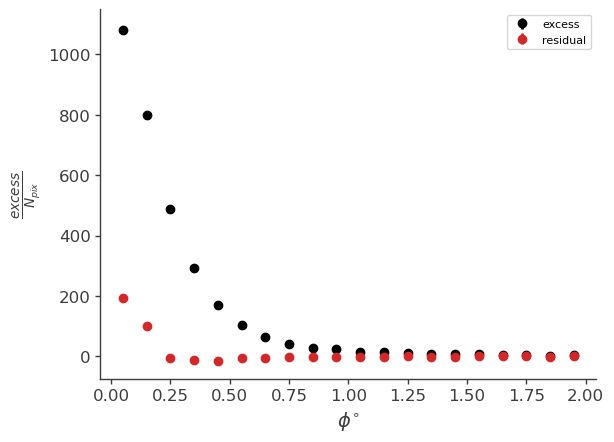

In [13]:
%matplotlib inline
psfdata = my.Draw_lateral_distribution(region_name, Modelname, maps[-1], 83.622, 22.002, 20, 0.1, True)

************************
[ 1.30998789e+03 -2.87761560e-02  1.26323852e+00]
************************
max Significance= 11.7
LHAASO:  1 83.62 22.01 1LHAASO J0534+2200u    Crab                  (0.01) 0.0
LHAASO:  2 86.07 23.19  1LHAASO J0542+2311u     1.45
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211 0.0
TeVCat:  2 83.62874999999998 22.01236111111111 Crab 0.0145
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar 0.0
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 85.79025 23.484722222222224 J0543+2329
PSR:  5 86.61983333333332 24.689166666666665 J0546+2441
SNR:  1 83.62916666666665 22.016666666666666 G184.6-05.8
3FHL:  1 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  2 83.634834 22.019203 3FHL J0534.5+2201
3FHL:  3 84.06884 17.566227 3FHL J0536.2+1733
4FGL:  1 79.9457 19.6646 4FGL J0519.7+1939
4FGL:  2

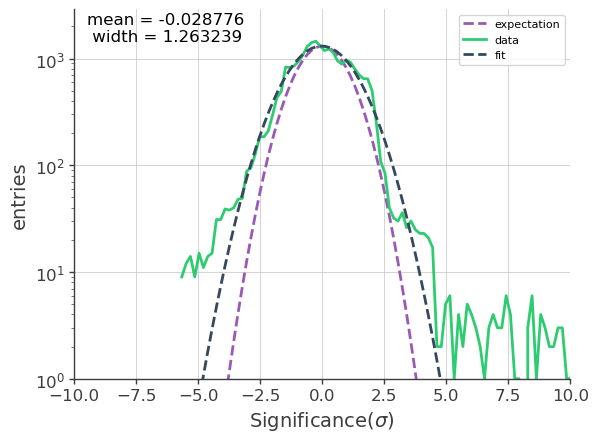

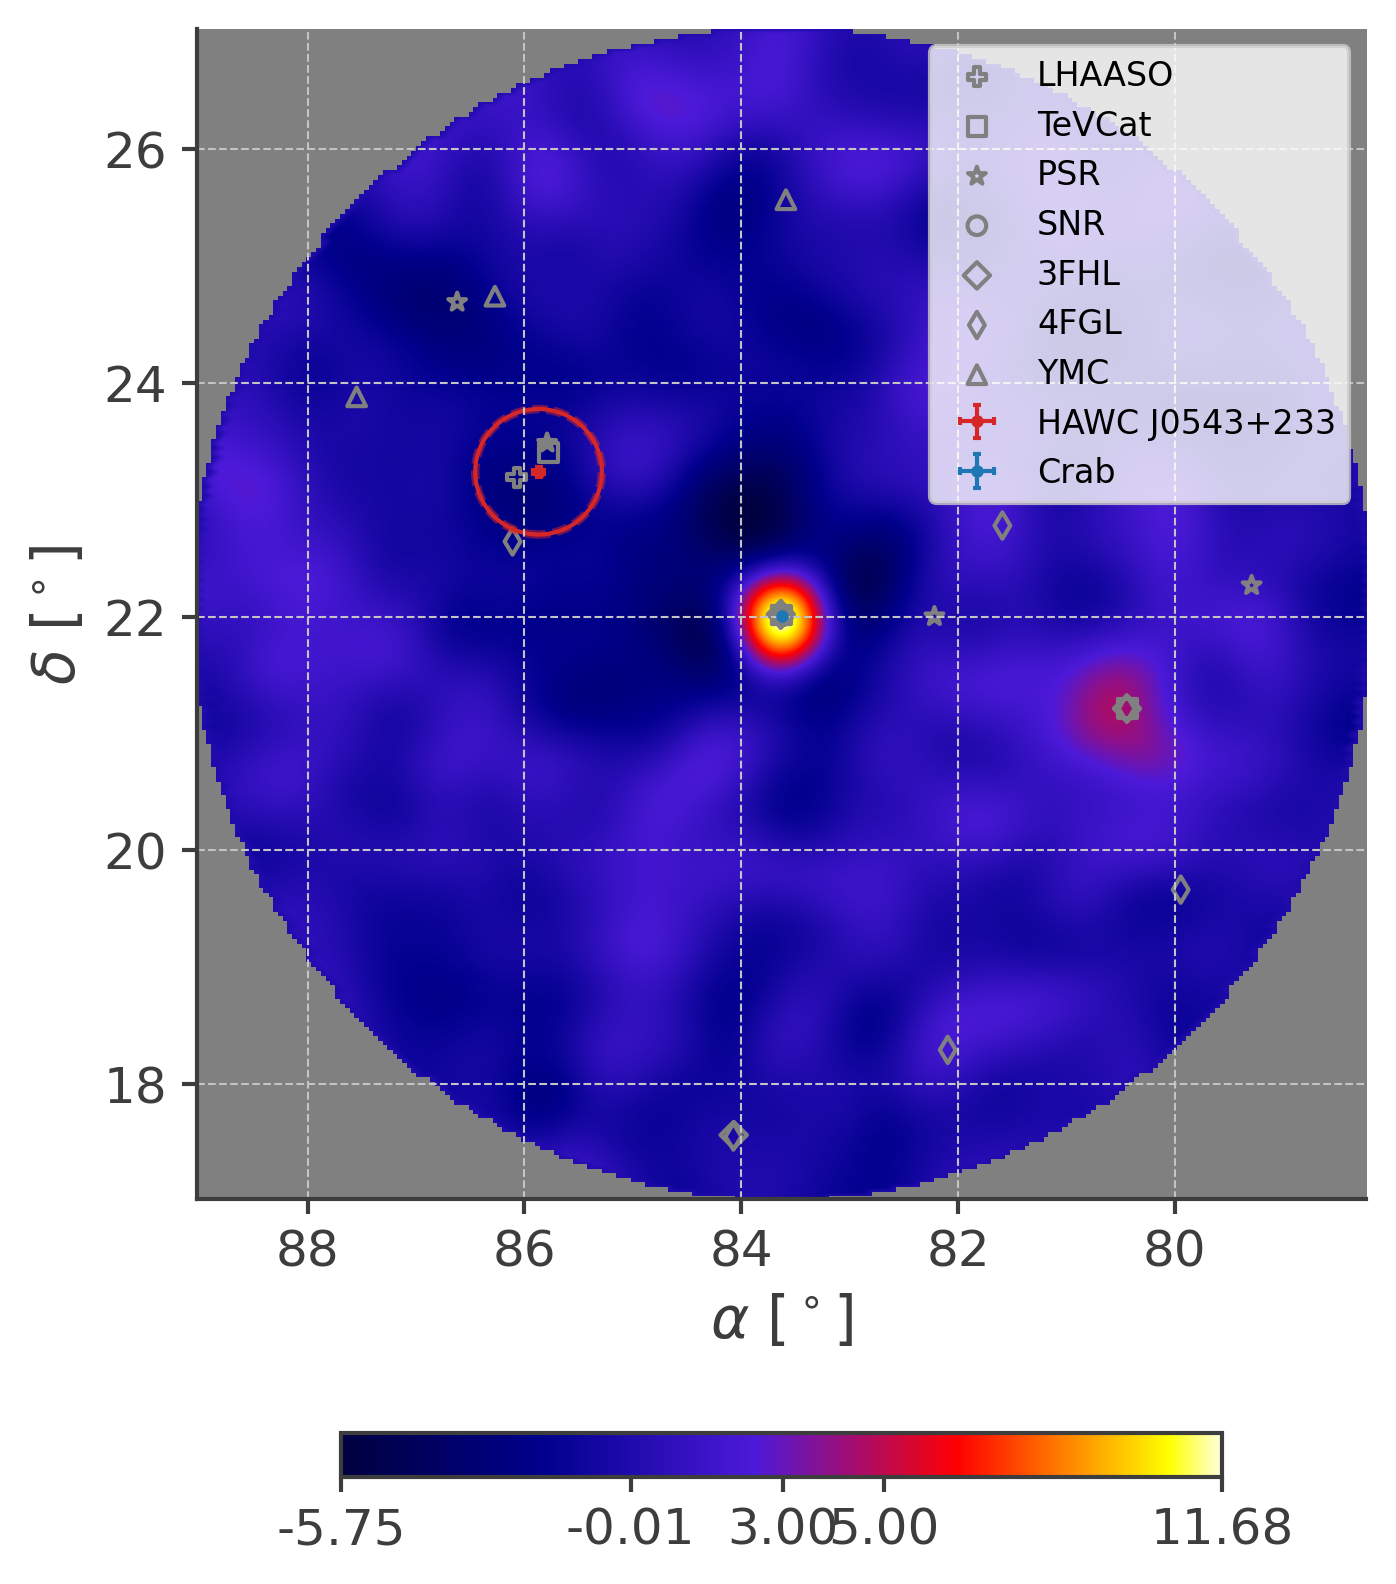

In [14]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="Crab")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=2*data_radius, contours=[1000],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [17]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "crab_res",
[0],[0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
binc="all"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

processing at nHit0 0


100%|██████████| 95570/95570 [00:02<00:00, 44573.56it/s]


processing at nHit0 1


100%|██████████| 95570/95570 [00:01<00:00, 53081.69it/s]


processing at nHit0 2


100%|██████████| 95570/95570 [00:01<00:00, 53080.10it/s]


processing at nHit0 3


100%|██████████| 95570/95570 [00:01<00:00, 49763.00it/s]


processing at nHit0 4


100%|██████████| 95570/95570 [00:01<00:00, 49263.01it/s]


processing at nHit0 5


100%|██████████| 95570/95570 [00:01<00:00, 54724.29it/s]
